In [19]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [20]:
from tensorflow.examples.tutorials.mnist import input_data

In [21]:
#Loading the data
mnist=input_data.read_data_sets('MNIST_data/',one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [22]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001BC03AF7DA0>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001BC04297D30>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001BC7F4C8588>)

In [23]:
mnist.train.images.shape,mnist.train.labels.shape

((55000, 784), (55000, 10))

In [24]:
mnist.test.images.shape

(10000, 784)

In [25]:
mnist.train.labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

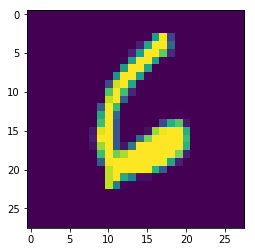

In [26]:
first_image=mnist.train.images[3]
first_image=np.array(first_image,dtype='float')
first_image=first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()

In [27]:

with tf.Session() as sess:
    print(tf.random_normal([784,256]).eval())

[[ 0.38980979  0.66228002  0.49433163 ...,  0.06849568  1.69441545
  -0.85047275]
 [ 0.13851547 -1.72504103 -0.7212522  ..., -0.11037377  1.30808914
   1.586308  ]
 [ 0.54671085  1.09137642 -0.61241007 ...,  2.24791002 -1.82529342
   1.51032281]
 ..., 
 [ 2.74095726 -0.63105506  0.25793111 ...,  0.438162   -0.35777175
   0.18028195]
 [ 0.65483356 -0.0517909   0.52831054 ..., -1.80533612  1.0481447
   0.7595554 ]
 [ 0.17743017 -0.79582751 -2.07532716 ..., -1.31132102 -1.29003358
   1.91051364]]


In [28]:
#Initializing weights and biases

n_input=784
n_hidden1=256
n_hidden2=256
n_classes=10

weights = {
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden1])),
    'h2':tf.Variable(tf.random_normal([n_hidden1,n_hidden2])),
    'out':tf.Variable(tf.random_normal([n_hidden2,n_classes]))
    
}

biases={
    'h1':tf.Variable(tf.random_normal([n_hidden1])),
    'h2':tf.Variable(tf.random_normal([n_hidden2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

In [29]:
weights

{'h1': <tf.Variable 'Variable_6:0' shape=(784, 256) dtype=float32_ref>,
 'h2': <tf.Variable 'Variable_7:0' shape=(256, 256) dtype=float32_ref>,
 'out': <tf.Variable 'Variable_8:0' shape=(256, 10) dtype=float32_ref>}

In [30]:
def forward_propagation(x,weights,biases):
    in_layer1=tf.add(tf.matmul(x,weights['h1']),biases['h1'])
    out_layer1=tf.nn.relu(in_layer1)
    
    in_layer2=tf.add(tf.matmul(out_layer1,weights['h2']),biases['h2'])
    out_layer2=tf.nn.relu(in_layer2)
    
    output=tf.add(tf.matmul(out_layer2,weights['out']),biases['out'])
    return output

In [31]:
x=tf.placeholder("float",[None,n_input])
y=tf.placeholder(tf.int32,[None,n_classes])
pred=forward_propagation(x,weights,biases)


In [32]:
#Cost Function Cross Entropy
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))

In [33]:
#Running the optimizer (Back Propagation)
optimizer=tf.train.AdamOptimizer(learning_rate=0.01)
optimize=optimizer.minimize(cost)

In [34]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [35]:
#applying Batch gradient Descent
batch_size=100

for i in range(30):
    total_cost=0
    num_batches = int(mnist.train.num_examples/batch_size)
    for j in range(num_batches):
        batch_x,batch_y=mnist.train.next_batch(batch_size)
        c,_=sess.run([cost,optimize],feed_dict={x:batch_x,y:batch_y})
        total_cost+=c
    print(total_cost)

27091.5288916
5154.52018906
2723.57224986
1925.02156329
1504.30223509
1246.82687133
1070.58543766
1168.33387378
898.101991904
813.790765917
643.626807721
650.485137453
560.785148286
553.654678106
471.672729774
394.881175369
353.121541236
329.659245084
404.843267921
281.177605711
212.768451878
210.373617297
187.65476914
145.274986605
154.540607357
126.612207626
133.456198666
118.610601608
131.783148821
103.381126864


In [37]:
predictions=tf.argmax(pred,1)
correct_labels=tf.argmax(y,1)
correct_predictions=tf.equal(predictions,correct_labels)
predictions,correct_predictions=sess.run([predictions,correct_predictions],feed_dict={x:mnist.train.images,y:mnist.test.labels})

correct_predictions.sum()  

#accuracy 96%

9608